# Task 2: Data Exploration


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import seaborn as sns
import altair as alt
from ipywidgets import interact, interact_manual
from ipywidgets import widgets


import pickle

sns.set(style="whitegrid")

In [2]:
# Make out of two files two dataframes for pandas:
raw_data = pd.read_csv("dataset/phase_2_TRAIN_8d8d624e3190984c_05dcbf4_MLPC2021_raw_annotations_generic.csv")
feature_data = pd.read_csv("dataset/phase_2_TRAIN_ab71fa4d86c94323_05dcbf4_MLPC2021_features_generic.csv")

In [3]:
feature_data.head(20)

# adding information for piansist piece and item
feature_data['pianist'] = [row['id'].split('-')[0] for _, row in feature_data.iterrows()]
feature_data['piece'] = [int(row['id'].split('-')[1]) for _, row in feature_data.iterrows()]
feature_data['item'] = [int(row['id'].split('-')[2]) for _, row in feature_data.iterrows()]

feature_data.head(20)

,id,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,...,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength,pianist,piece,item
0,GG-01-000,0.206445,0.131383,13.998791,58.329521,3.1,0.539736,0.193987,3367.790527,3684.124268,...,-0.303987,-0.053306,-0.325228,0.347745,-0.119278,0.0,0.795727,GG,1,0
1,GG-01-001,0.145753,0.057971,3.533264,75.166183,4.2,0.476832,0.123564,1395.528809,401.987610,...,-0.381182,0.120750,-0.479266,0.451572,-0.064252,0.0,0.844387,GG,1,1
2,GG-01-002,0.149111,0.059011,3.337368,82.753929,4.3,0.457741,0.132359,1318.759644,289.306152,...,-0.337422,0.103853,-0.388214,0.430684,-0.226197,0.0,0.758119,GG,1,2
3,GG-01-003,0.163914,0.057474,3.078172,79.024742,4.1,0.504427,0.121134,1258.258423,262.561310,...,-0.314282,0.118872,-0.335902,0.314371,-0.006619,1.0,0.747180,GG,1,3
4,GG-01-004,0.157382,0.054116,2.682208,59.633064,3.9,0.503377,0.121658,1244.375122,260.756195,...,-0.302913,-0.002940,-0.395495,0.368037,-0.162711,0.0,0.710480,GG,1,4
5,GG-01-005,0.144293,0.050306,2.384160,40.288383,3.9,0.564172,0.134602,1335.164795,324.168091,...,-0.339230,0.047944,-0.376983,0.305204,0.131467,0.0,0.769594,GG,1,5
6,GG-01-006,0.167072,0.062772,2.695455,38.387379,3.3,0.597439,0.116931,1296.711426,343.576202,...,-0.276364,-0.119744,-0.219856,0.120111,0.038362,0.0,0.817381,GG,1,6
7,GG-01-007,0.166078,0.060919,2.386385,37.789707,3.4,0.620239,0.121919,1248.964966,272.556305,...,-0.359574,0.068178,-0.443103,0.312179,-0.189872,0.0,0.663069,GG,1,7
8,GG-01-008,0.209537,0.071765,2.543967,54.642323,3.7,0.652198,0.131394,1152.298706,218.963364,...,-0.263720,-0.103709,-0.198583,0.176578,-0.109147,1.0,0.618076,GG,1,8
9,GG-01-009,0.222750,0.073594,2.108306,83.023453,4.0,0.644371,0.122771,1082.754028,154.882858,...,-0.277805,-0.014473,-0.292467,0.245101,-0.153421,1.0,0.776385,GG,1,9


In [4]:
raw_data

,student,pianist,piece,arousal,valence
0,student_000,GG,1,30,-1
1,student_000,GG,2,30,1
2,student_000,GG,3,70,-2
3,student_000,GG,4,30,0
4,student_000,GG,5,90,2
...,...,...,...,...,...
5737,student_165,RT,39,80,-4
5738,student_165,RT,41,100,4
5739,student_165,RT,45,50,1
5740,student_165,RT,46,40,2


In [5]:
def get_class(arousal, valence):
    a = (arousal-50)/50
    v = valence/5
    if v <= 0 and a>0:
        return 'angry'
    elif v<0 and a<=0:
        return 'sad'
    elif v>0 and a>=0:
        return 'happy'
    elif v>=0 and a<0:
        return 'relaxed'
    
def get_angle(arousal, valence):
    a = (arousal-50)/50
    v = valence/5
    return np.arctan2(v,a) * 180 / np.pi

In [6]:
# adjust the get_class function according to the announced adjustments
def get_class(a, v):
    if v <= 0 and a>50:
        return 'angry'
    elif v<0 and a<=50:
        return 'sad'
    elif v>0 and a>=50:
        return 'happy'
    elif v>=0 and a<50:
        return 'relaxed'
    
def get_angle(arousal, valence):
    return np.arctan2(valence,arousal) * 180 / np.pi

In [7]:
raw_data_prep = raw_data.copy()

# calculate classes:
classes  = [get_class(row['arousal'] , row['valence']) for _, row in raw_data_prep.iterrows()]
angles  = [get_angle(row['arousal'] , row['valence']) for _, row in raw_data_prep.iterrows()]

# add title and classes
raw_data_prep['title'] = [row['pianist'] + '-{:02d}'.format(row['piece']) for _, row in raw_data_prep.iterrows()]
raw_data_prep['angle'] = angles
raw_data_prep['discrete_emotion'] = classes

raw_data_prep

,student,pianist,piece,arousal,valence,title,angle,discrete_emotion
0,student_000,GG,1,30,-1,GG-01,-1.909152,sad
1,student_000,GG,2,30,1,GG-02,1.909152,relaxed
2,student_000,GG,3,70,-2,GG-03,-1.636577,angry
3,student_000,GG,4,30,0,GG-04,0.000000,relaxed
4,student_000,GG,5,90,2,GG-05,1.273030,happy
...,...,...,...,...,...,...,...,...
5737,student_165,RT,39,80,-4,RT-39,-2.862405,angry
5738,student_165,RT,41,100,4,RT-41,2.290610,happy
5739,student_165,RT,45,50,1,RT-45,1.145763,happy
5740,student_165,RT,46,40,2,RT-46,2.862405,relaxed


## 1. How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt?

In [8]:
# Ideas: 
# look at variances/std of single pieces
# look at each/some distributions of values of single pieces: histogram for counting which values one piece got
# look at mean vs median
# compare the number or percentage of students voting for the dominant class in case of each piece to identify controversial pieces
# or..

In [9]:
user_rating = raw_data_prep.groupby(['title', 'pianist', 'piece']).agg(["mean", "var"])
user_rating.columns = ['arousal_mean', 'arousal_var', 'valence_mean', 'valence_var', 'angle_mean', 'angle_var']

# calculate classes:
classes  = [get_class(row['arousal_mean'] , row['valence_mean']) for _, row in user_rating.iterrows()]
user_rating['class_mean'] = classes

user_rating

,,,arousal_mean,arousal_var,valence_mean,valence_var,angle_mean,angle_var,class_mean
title,pianist,piece,,,,,,,
AH-01,AH,1,40.714286,925.396825,1.821429,8.892857,9.508164,585.776706,relaxed
AH-02,AH,2,46.206897,360.098522,1.793103,2.241379,2.068889,3.716555,relaxed
AH-03,AH,3,86.785714,489.285714,-1.642857,4.756614,-4.149460,285.543335,angry
AH-04,AH,4,47.241379,392.118227,-0.275862,3.206897,-0.810630,6.407954,sad
AH-05,AH,5,63.214286,370.767196,3.500000,1.666667,3.246943,1.040161,happy
...,...,...,...,...,...,...,...,...,...
SR-39,SR,39,81.379310,376.600985,0.275862,7.921182,0.388730,6.396737,happy
SR-41,SR,41,80.689655,406.650246,2.310345,4.150246,2.154412,10.731935,happy
SR-45,SR,45,40.344828,310.591133,1.275862,3.564039,1.880836,12.045033,relaxed


In [10]:
user_rating_chart = alt.Chart(user_rating.reset_index(), title='mean user ratings').mark_point().encode(
    y ='arousal_mean',
    x ='valence_mean',
    # size = 'valence_var',
    # color = 'arousal_var'
    tooltip = ['title', 'class_mean', 'arousal_var', 'valence_var']
).properties(width=400, height=300)

user_rating_chart #.encode(color='arousal_var') | user_rating_chart.encode(color='valence_var')

alt.Chart(...)

In [11]:
# based on the mean classes, check whether there is any bias in the dataset based on the performer/pianist
aggr_ratings = user_rating.reset_index()

alt.Chart(aggr_ratings).mark_bar().encode(
    x=alt.X('class_mean:N', axis=alt.Axis(title=None)),
    y='count(piece):Q',
    color=alt.Color('class_mean:N',title='Predicted class'),
    column='pianist:N'
)

alt.Chart(...)

In [12]:
# check the distribution of classes for each piece, counting the performers
alt.Chart(aggr_ratings).mark_bar().encode(
    x=alt.X('class_mean:N', axis=alt.Axis(title=None)),
    y='count():Q',
    color=alt.Color('class_mean:N',title='Predicted class'),
    facet=alt.Facet('piece:N', columns=6)
)

alt.Chart(...)

In [13]:
toggle_title = widgets.Dropdown(options=raw_data_prep['title'], value='AH-01', description="Title")

groups = raw_data_prep.groupby(['title'])

@interact(title=toggle_title)
def plot_(title):
    group = groups.get_group(title)
    group['arousal'].hist(color='c', edgecolor='k', alpha=0.65, bins=np.linspace(-5, 105, 12))
    plt.xticks(ticks=range(0, 105, 10))
    plt.axvline(group['arousal'].mean(), color='r', linestyle='dashed', linewidth=2, label='mean')
    plt.axvline(group['arousal'].median(), color='y', linestyle='dashed', linewidth=2, label='median')
    plt.title('Histogram of ' + title)
    plt.ylabel('count')
    plt.xlabel('arousal')
    plt.legend()
    plt.show()
    
    group['valence'].hist(color='c', edgecolor='k', alpha=0.65, bins=np.linspace(-5.5, 5.5, 12))
    plt.xticks(ticks=range(-5, 6))
    plt.axvline(group['valence'].mean(), color='r', linestyle='dashed', linewidth=2, label='mean')
    plt.axvline(group['valence'].median(), color='y', linestyle='dashed', linewidth=2, label='median')
    plt.title('Histogram of ' + title)
    plt.ylabel('count')
    plt.xlabel('valence')
    plt.legend()
    plt.show()

    group.plot.scatter(color='c', x='valence', y='arousal', label='user ratings')
    plt.scatter(group['valence'].mean(), group['arousal'].mean(), label='mean', s=50, c='r')
    plt.scatter(group['valence'].median(), group['arousal'].median(), label='median', s=50, c='y')
    plt.axvline(0, color='c', linewidth=1)
    plt.axhline(50, color='c', linewidth=1)
    plt.title('User ratings')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='Title', index=1837, options=('GG-01', 'GG-02', 'GG-03', 'GG-04', '…

How consistent are the emotion annotations? Do different annotators agree in their ratings of the same excerpt?<br><br> 

By inspecting the classes determined by the mean ratings, we can establish that there is no significant bias on the resulting emotion labels generated by the performer. The distribution of the resulting class labels follow a similar pattern for all of them, the slight differences may be due to the nature of data collection (i.e. there was no overlap between the students evaluating the pieces performed by one pianist or the other).<br> 

When it comes to individual pieces, we see that nearly half of them evoked the same emotions in all 6 groups, however, there were 19 pieces out of the provided 36 that got a conflicting label (2 or more classes were identified), with one piece (4) looking very controversial. This implies that annotators tend to agree with each other on some pieces, but may disagree on the emotions implied by "more difficult" excerpts.<br>


Here are some examples in more detail:<br> 
Valence:<br> Pianist:AH, Piece:08: Here all annotators rated with valences < 0. The majority voted for a valence <= -4. 
<br><br>
Arousal: <br> Pianist:AS, Piece:41: Most of the annotators scored here with >= 60. However, it becomes clear the largest mode lays by 100 (9 persons) whereas also lots voted for 70 (7 persons). Even here you can observe that the annotators' ratings vary but at least there seems to be a pattern.


However, often the annotators have different opinions about the annotations such that is hard to recognize any pattern. E. g.:
Valence:<br>Pianist:AS, Piece:22: Here most annotators agreed with a valence of 1 (9 persons). However, a lot also scored here with a higher valence of 3 and 4 (in total 8 persons) and even 4 persons rated the piece as negative with values of -1 and -2. 
<br><br>
Arousal: <br> Pianist:GG, Piece:35: Here the annotators rated relatively high but also low and middle. The consequence is that the median and mean are at the near of the middle score 50 and alone are no adequate tools to tell something about the data distribution.
<br><br>Overall there seem to be a relationship within the annotators' ratings for the single pieces often. The annotators agree raw in what has a positive and what a negative valence. In arousal that was not that often and obvious the case (differentiation with threshold 50). In total there is often a huge rating range and a difficulty in accurate class conformity for single pieces.

## 2. How are the emotion annotations (valence, arousal, or angle) related to the major/minor feature?

The major/minor features are stored in the _score_mode_ attribute, with 0 corresponding to major and 1 to minor mode. The hypothesis to validate is that major keys convey happier, more cheerful emotions, while minor keys sound more melancholic (source: https://www.musical-u.com/learn/major-minor-keys/). 

In [14]:
# e. g. pieces with high valence have a high value of feature x. --> Sounds like correlation task
# heatmap could be interesting
# next step: focus heatmap on the score_mode (see note above)

In [15]:
# get feature list
major_features = list(feature_data.columns[1:16])
librosa_features = list(feature_data.columns[16:81])
minor_features = list(feature_data.columns[81:90])

# calucalting correlation matrix
feature_data_merged = feature_data.merge(user_rating, left_on=['pianist', 'piece'], right_on=['pianist', 'piece'])
corr_matrix = feature_data_merged.corr()

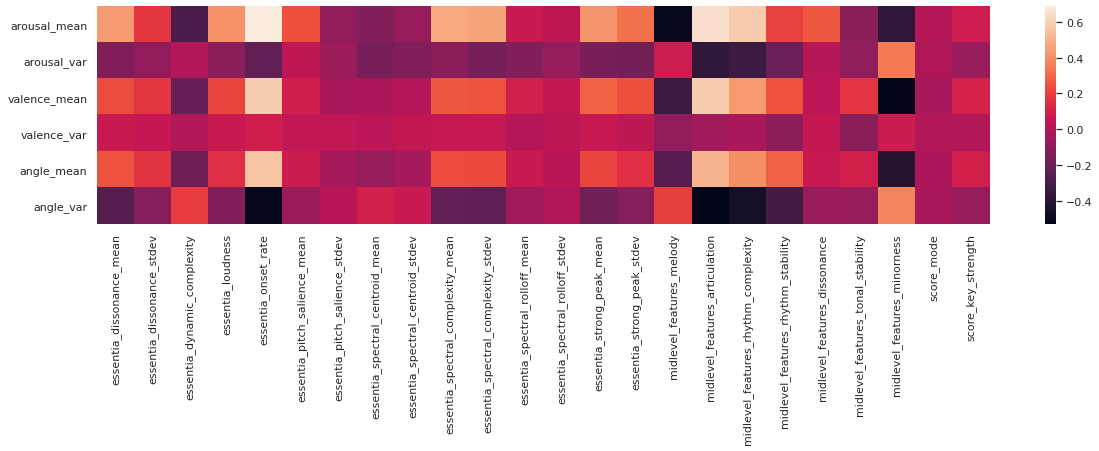

In [16]:
matrix = corr_matrix[major_features + minor_features].loc[['arousal_mean', 'arousal_var', 'valence_mean', 'valence_var', 'angle_mean', 'angle_var']]

fig, ax = plt.subplots(figsize=(20,4))
ax = sns.heatmap(matrix, ax=ax)

In [17]:
matrix[abs(matrix) > 0.35]

,essentia_dissonance_mean,essentia_dissonance_stdev,essentia_dynamic_complexity,essentia_loudness,essentia_onset_rate,essentia_pitch_salience_mean,essentia_pitch_salience_stdev,essentia_spectral_centroid_mean,essentia_spectral_centroid_stdev,essentia_spectral_complexity_mean,...,essentia_strong_peak_stdev,midlevel_features_melody,midlevel_features_articulation,midlevel_features_rhythm_complexity,midlevel_features_rhythm_stability,midlevel_features_dissonance,midlevel_features_tonal_stability,midlevel_features_minorness,score_mode,score_key_strength
arousal_mean,0.436936,NaN,NaN,0.409124,0.687604,NaN,NaN,NaN,NaN,0.47693,...,NaN,-0.504249,0.646536,0.584442,NaN,NaN,NaN,-0.378733,NaN,NaN
arousal_var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.367743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence_mean,NaN,NaN,NaN,NaN,0.592564,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.584858,0.437002,NaN,NaN,NaN,-0.528123,NaN,NaN
valence_var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
angle_mean,NaN,NaN,NaN,NaN,0.562076,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.512421,0.405568,NaN,NaN,NaN,-0.412116,NaN,NaN
angle_var,NaN,NaN,NaN,NaN,-0.513915,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.523768,-0.462996,NaN,NaN,NaN,0.379754,NaN,NaN


##### How are the emotion annotations (valence, arousal, or angle) related to the major/minor feature?<br>
Until the column name 'midlevel_features_melody' excluded are the major features. After that the minor features.<br>
<br>Outstanding features for each calculated value are: <br>

**arousal_mean**: _essentia_onset_rate_, _midlevel_features_melody_, _midlevel_features_articualtion_, _midlevel_features_rythm_complexity_, _midlevel_features_minorness_ which are medium/high positively (r > 0.6) or slightly negatively ( r < -0.4) correlated.<br>
**arousal_var**: Only weak correlations were detected, with the features _midlevel_features_articulation_ (r < -0.35) and _midlevel_features_minorness_ (r > 0.3).<br>
**valence_mean**: _midlevel_features_minorness_ is the only one that really outstands with r < -0.4.<br>
**valence_var**: None of the above features show an outstanding, strong correlation with the variance.<br>

Note that angle combines the effects observed at the arousal and/or valence level, as it's calculated from the two values.<br>
**angle_mean**: Also here only _midlevel_features_minorness_ stands out with r < -0.4.<br>
**angle_var**: Some of the above features show a medium negative correlation (r < -0.4) with the variance in angle values, those are _essentia_onset_rate_, _midlevel_features_articualtion_, _midlevel_features_rythm_complexity_. On the positive correlation's side only _midlevel_features_minorness_ is notable, but in a weak way.<br>


It follows that _midlevel_features_minorness_ seems to be the most important feature, but we intend to keep all of the mentioned features in the upcoming analysis. 

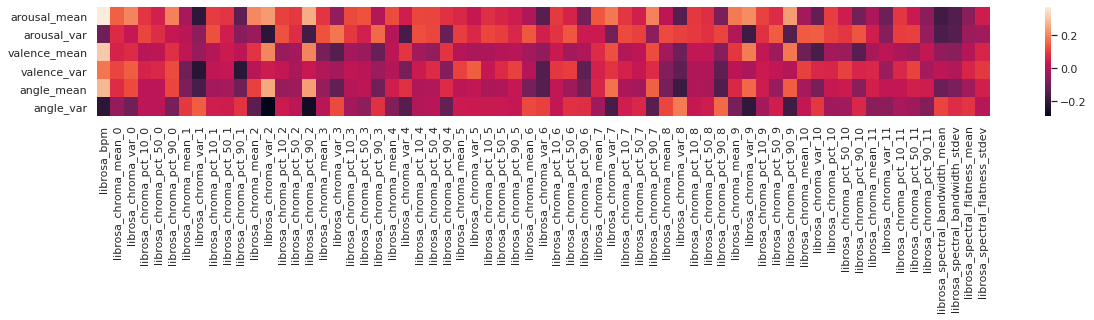

In [18]:
matrix = corr_matrix[librosa_features].loc[['arousal_mean', 'arousal_var', 'valence_mean', 'valence_var', 'angle_mean', 'angle_var']]

fig, ax = plt.subplots(figsize=(20,2))
ax = sns.heatmap(matrix, ax=ax)

In [19]:
matrix[abs(matrix) > 0.35]

,librosa_bpm,librosa_chroma_mean_0,librosa_chroma_var_0,librosa_chroma_pct_10_0,librosa_chroma_pct_50_0,librosa_chroma_pct_90_0,librosa_chroma_mean_1,librosa_chroma_var_1,librosa_chroma_pct_10_1,librosa_chroma_pct_50_1,...,librosa_chroma_pct_90_10,librosa_chroma_mean_11,librosa_chroma_var_11,librosa_chroma_pct_10_11,librosa_chroma_pct_50_11,librosa_chroma_pct_90_11,librosa_spectral_bandwidth_mean,librosa_spectral_bandwidth_stdev,librosa_spectral_flatness_mean,librosa_spectral_flatness_stdev
arousal_mean,0.372452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arousal_var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
valence_var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
angle_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
angle_var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the librosa_features, we didn't find any positive/negative correlations with the calculated arousal and valence values, therefore they are not needed. For further analysis, _librosa_bpm_ may be kept though. Apart from _librosa_chroma_var_2_ that was the one with the largest correlation coefficients in both directions and this attribute represents the tempo estimation (beats per minute) which - from an initial judgement's perspective - could be relevant in conveying different emotions. <br>

In [20]:
raw_data_prep.head()

,student,pianist,piece,arousal,valence,title,angle,discrete_emotion
0,student_000,GG,1,30,-1,GG-01,-1.909152,sad
1,student_000,GG,2,30,1,GG-02,1.909152,relaxed
2,student_000,GG,3,70,-2,GG-03,-1.636577,angry
3,student_000,GG,4,30,0,GG-04,0.000000,relaxed
4,student_000,GG,5,90,2,GG-05,1.273030,happy


In [21]:
# add score_mode to raw ratings
df_user_rating_modes = raw_data_prep.merge(feature_data[['pianist', 'piece','score_mode']], left_on=['pianist', 'piece'], right_on=['pianist', 'piece'])

df_user_rating_modes['mode'] = np.where(df_user_rating_modes['score_mode'] == 0, 'major', 'minor')

In [22]:
df_user_rating_modes.head()

,student,pianist,piece,arousal,valence,title,angle,discrete_emotion,score_mode,mode
0,student_000,GG,1,30,-1,GG-01,-1.909152,sad,0.0,major
1,student_000,GG,1,30,-1,GG-01,-1.909152,sad,0.0,major
2,student_000,GG,1,30,-1,GG-01,-1.909152,sad,0.0,major
3,student_000,GG,1,30,-1,GG-01,-1.909152,sad,1.0,minor
4,student_000,GG,1,30,-1,GG-01,-1.909152,sad,0.0,major


In [23]:
df_user_rating_modes.shape

(68795, 10)

In [24]:
def plot_distribution_with_mode(feature):
    
    df = df_user_rating_modes.groupby(['mode',feature]).size().reset_index()
    
    df.rename(columns = {0: 'count_ratings'}, inplace = True)
    
    hist = alt.Chart(df).mark_area(
        opacity=0.5,
        interpolate='step'
    ).encode(
        x=feature,
        y='count_ratings:Q',
        color=alt.Color('mode:N'),
    ).properties(
        width=160,
        height=160,
        title=f'Distribution of {feature} ratings in terms of minor/major mode'
    )
    
    return hist

In [25]:
plot_distribution_with_mode('valence')

alt.Chart(...)

In [26]:
plot_distribution_with_mode('arousal')

alt.Chart(...)

In [27]:
plot_distribution_with_mode('angle')

alt.Chart(...)

In [28]:
def plot_feat_boxplot_with_mode(feature):
    
    df = df_user_rating_modes.groupby(['mode','title',feature]).size().reset_index()
    
    df.rename(columns = {0: 'count_entries'}, inplace = True)
    
    bp = alt.Chart(df).mark_boxplot().encode(
        x='mode:N',
        y=feature,
        color=alt.Color('mode:N', legend=None),
    ).properties(
        width=160,
        height=160,
        title=f'Boxplot of {feature} ratings in terms of minor/major mode'
    )
    
    return bp

In [29]:
plot_feat_boxplot_with_mode('valence')

alt.Chart(...)

In [30]:
def plot_feat_boxplot_with_mode(feature):
    
    bp = sns.boxplot(y=feature,x='mode', data=df_user_rating_modes,orient='v',hue='mode')
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    return bp

<AxesSubplot:xlabel='mode', ylabel='valence'>

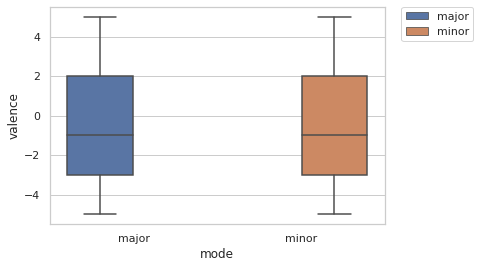

In [31]:
plot_feat_boxplot_with_mode('valence')

<AxesSubplot:xlabel='mode', ylabel='arousal'>

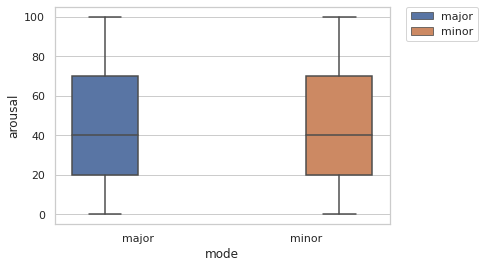

In [32]:
plot_feat_boxplot_with_mode('arousal')

In [33]:
df_user_ratings_grouped = df_user_rating_modes.groupby(['title','arousal','valence', 'angle']).size().reset_index(name='count_ratings')

In [34]:
df_user_ratings_grouped.head()

,title,arousal,valence,angle,count_ratings
0,AH-01,0,5,90.000000,22
1,AH-01,10,-4,-21.801409,11
2,AH-01,10,0,0.000000,11
3,AH-01,10,2,11.309932,22
4,AH-01,10,3,16.699244,11


In [35]:
alt.Chart(df_user_ratings_grouped).mark_rect().encode(
    alt.X('arousal:Q', title='Arousal score'),
    alt.Y('valence:Q', title='Valence score'),
    alt.Color('count_ratings:Q', title='Count of ratings' ,scale=alt.Scale(scheme='bluegreen'))
)

alt.Chart(...)

In [36]:
df_user_ratings = df_user_rating_modes.groupby(['mode','arousal','valence','angle']).size().reset_index(name='count_ratings')


In [37]:
alt.Chart(df_user_ratings).mark_rect().encode(
    alt.X('arousal:Q', title='Arousal score'),
    alt.Y('valence:Q', title='Valence score'),
    color=alt.Color('count_ratings:Q', title='Count of ratings' ,scale=alt.Scale(scheme='bluegreen')),
    facet=alt.Facet('mode:N', columns=4)
)

alt.Chart(...)

**Comment** I strongly doubt that the two groups look exactly the same, with constant distribution of arousal scores across different valence ratings.. Maybe the count should be modified. Unfortunately altair can't handle more than 5000 records and there was a cross-rating between piano pieces and students, a unique count of either of those wouldn't work. <br>

In [38]:
# final attempt at calculating the correlations for score_mode, using numpy
df_corr_filtered = df_user_rating_modes[['arousal','valence','angle','score_mode']]

In [39]:
x_corr = df_corr_filtered.values
df_filtered_correlation_mx = np.corrcoef(x_corr.T)

In [40]:
df_filtered_correlation_mx

array([[ 1.        ,  0.23744449,  0.33401989,  0.00643548],
       [ 0.23744449,  1.        ,  0.42821411, -0.01545931],
       [ 0.33401989,  0.42821411,  1.        , -0.00311785],
       [ 0.00643548, -0.01545931, -0.00311785,  1.        ]])

Overall, _score_mode_ didn't show a correlation with the given arousal and valence ratings, however, due to the initial hypothesis, it would be worth to keep this variable, keeping in mind that it may overlap to some extent with the _midlevel_features_minorness_. 

## 3. Derive discrete quadrant-based class labels from the raw annotations. Any ideas on how to aggregate conflicting annotations? Outliers?

In [41]:
# We add a new column to dataframe which describes the emotion by the given values for each row:
'''
raw_data['discrete_emotion'] = ''
for index in raw_data.index:
    if raw_data.loc[index, 'arousal'] >= 50 and raw_data.loc[index, 'valence'] > 0:
        raw_data.loc[index, 'discrete_emotion'] = 'happy'
    elif raw_data.loc[index, 'arousal'] >= 50 and raw_data.loc[index, 'valence'] <= 0:
        raw_data.loc[index, 'discrete_emotion'] = 'angry'
    elif raw_data.loc[index, 'arousal'] < 50 and raw_data.loc[index, 'valence'] >= 0:
        raw_data.loc[index, 'discrete_emotion'] = 'relaxed'
    elif raw_data.loc[index, 'arousal'] <= 50 and raw_data.loc[index, 'valence'] < 0:
        raw_data.loc[index, 'discrete_emotion'] = 'sad'
raw_data
'''
raw_data = raw_data_prep
raw_data

,student,pianist,piece,arousal,valence,title,angle,discrete_emotion
0,student_000,GG,1,30,-1,GG-01,-1.909152,sad
1,student_000,GG,2,30,1,GG-02,1.909152,relaxed
2,student_000,GG,3,70,-2,GG-03,-1.636577,angry
3,student_000,GG,4,30,0,GG-04,0.000000,relaxed
4,student_000,GG,5,90,2,GG-05,1.273030,happy
...,...,...,...,...,...,...,...,...
5737,student_165,RT,39,80,-4,RT-39,-2.862405,angry
5738,student_165,RT,41,100,4,RT-41,2.290610,happy
5739,student_165,RT,45,50,1,RT-45,1.145763,happy
5740,student_165,RT,46,40,2,RT-46,2.862405,relaxed


In [ ]:
# Any ideas on how to aggregate conflicting annotations? Outliers? - take majority vote or MEDIAN
# Are conflicting annotations of several students for one single piece meant? - yes, I'd understand it that way
# What is meant with outliers in this case? one student who has always other opinion than others? 

Ideas on handling outliers: We can (partially) remove ratings/observations out of a certain range based on IQR or a different percentile, use a different averaging method (e.g. trim_mean). Alternatively, we can detect and remove entire users with particularly poor hearing or deviating ratings, if such information is at hand. <br>

In general, outlier removal would require more sophisticated methods, it's not part of our data exploration.

In [ ]:
# is it enough to answer the question of treating outliers,... by only using words (no code)?

## 4. How are the resulting discrete class labels distributed? Are the classes unbalanced, and how much?

In [ ]:
# Ideas:
# Determine by majority vote (of student annotations) if a piece is happy/something else.
# Then we could make a histogram: x-axis: sad, happy, relaxed, angry
# statistical tool to determine how unbalanced classes are?

In [42]:
# testing for imbalance based on this thread? 
# https://stats.stackexchange.com/questions/239973/a-general-measure-of-data-set-imbalance

def balance(seq):
    from collections import Counter
    from numpy import log
    
    n = len(seq)
    classes = [(clas,float(count)) for clas,count in Counter(seq).items()]
    k = len(classes)
    
    H = -sum([ (count/n) * log((count/n)) for clas,count in classes]) #shannon entropy
    return H/log(k)
    # we have a perfect balance when value of 1
    # bad would be a balance <= 0.5

In [43]:
raw_data3 = raw_data[['piece', 'discrete_emotion']]
raw_data3 = raw_data3.sort_values(['piece'])
raw_data3 = raw_data3.set_index('piece')
raw_data3
counted_values_each_piece = raw_data3.value_counts()#.sort_index()
#for i in counted_values_each_piece:
 #   N =raw_data3.loc[i-1, 'piece']

counted_values_each_piece

discrete_emotion
happy               2004
sad                 1376
relaxed             1239
angry               1081
dtype: int64

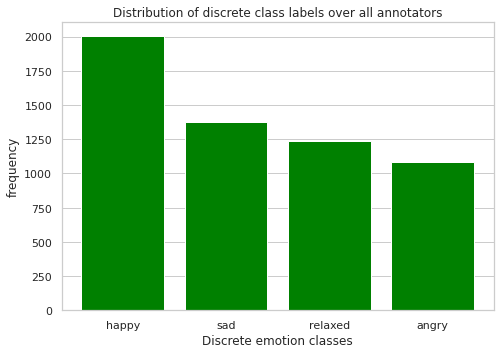

In [44]:
# Let's make a plot over ALL annotations:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
discrete_labels=[]
for i in range(len(counted_values_each_piece)):
    discrete_labels.append(counted_values_each_piece.keys()[i][0])

plt.title('Distribution of discrete class labels over all annotators')
plt.xlabel('Discrete emotion classes')
plt.ylabel('frequency')

ax.grid(axis="x") # horizontal line grid outcome 
ax.bar(discrete_labels,counted_values_each_piece, color='green')
plt.show()

There are much more 'happy' labels than the other ones in total. Maybe it becomes better when we take the mean over several ratings for one piecexpianist and take its label to evaluate the balance:

In [45]:
print(f'''
Balance refered to each single sample (single piece, pianist and annotator):
{balance(raw_data3['discrete_emotion'])}
''')


Balance refered to each single sample (single piece, pianist and annotator):
0.8642715199068589



In [46]:
# Consider class mean: One single piece with pianist gets single discrete class: use user_rating 
user_rating_class_dis = user_rating[["class_mean"]]

user_rating_counts = user_rating_class_dis.value_counts()
user_rating_counts

class_mean
happy         77
sad           69
relaxed       45
angry         25
dtype: int64

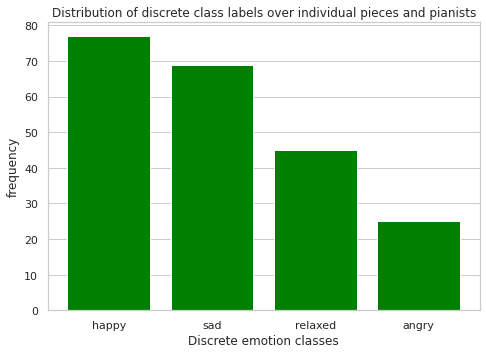

In [47]:
# Let's make a plot over individual piecexpianist discrete classes:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
discrete_labels=[]
for i in range(len(user_rating_counts)):
    discrete_labels.append(user_rating_counts.keys()[i][0])

plt.title('Distribution of discrete class labels over individual pieces and pianists')
plt.xlabel('Discrete emotion classes')
plt.ylabel('frequency')

ax.grid(axis="x") # horizontal line grid outcome 
ax.bar(discrete_labels,user_rating_counts, color='green')
plt.show()

Problem: 'happy' (77) vs. 'angry' (25) --> 'angry' appears 52 times less.

In [48]:
print(f'''
Balance refered to each single piecexpianist label:
{balance(user_rating["class_mean"])}
''')
# a good balance store but the histogram doesn't show us such a beautiful distribution


Balance refered to each single piecexpianist label:
0.9439702667520941



## 5. How are the features distributed? Are there any pairs or subsets of features that seem highly correlated or redundant?

In [ ]:
# generate scatter plot matrix on all or a subset of features, most of them are numeric anyhow

In [ ]:
feature_data_merged.columns

In [49]:
def create_scatter_plot_mx(feature_list):

    smx = alt.Chart(feature_data_merged).mark_circle().encode(
        alt.X(alt.repeat("column"), type='quantitative'),
        alt.Y(alt.repeat("row"), type='quantitative'),
        size=alt.Size('count():Q', scale=alt.Scale(range=[1, 300])),
    ).properties(width=200,height=200
    ).repeat(
        row=feature_list,
        column=feature_list[::-1])
    
    return smx

In [50]:
# for the feature lists, see task 2
create_scatter_plot_mx(major_features)

(more or less) high positive correlations among the major features: e. g.<br>
essentia_spectal_complexity_stedv and essentia_dissonance_mean<br>
essentia_spectral_complexity_mean and essentia_dissonance_mean<br>
essentia_strong_peak_stdev and essentia_loudness <br>
essentia_strong_peak_mean and essentia_loudness<br>
essentia_strong_peak_mean and essentia_spectral_complexity_mean<br>
essentia_strong_pead_stdev and essentia_spectal_complexity_mean<br>

In [ ]:
create_scatter_plot_mx(minor_features)

(more or less) high negative correlations among the minor features:<br>
midlevel_features_melody and midlevel_features_dissonance<br>
midlevel_features_articulation and midlevel_features_minorness<br>
midlevel_features_dissonance and midlevel_features_tonal_stability<br>
<br>
high positive correlations:<br>
midlevel_features_rhythm_complexity and midlevel_features_articulation<br><br>


## 6. Which features seem useful for classification? Which ones are correlated with the labels?

In [ ]:
# apply color map on scatter plot matrix, then check correlations in more depth for suspicious features
def create_grouped_scatter_plot_mx(feature_list):

    smx = alt.Chart(feature_data_merged).mark_circle().encode(
        alt.X(alt.repeat("column"), type='quantitative'),
        alt.Y(alt.repeat("row"), type='quantitative'),
        size=alt.Size('count():Q', scale=alt.Scale(range=[1, 300])),
        color=alt.Color('class_mean:N'),
    ).properties(width=200,height=200
    ).repeat(
        row=feature_list,
        column=feature_list[::-1])
    
    return smx

In [ ]:
create_grouped_scatter_plot_mx(major_features)

In [ ]:
create_grouped_scatter_plot_mx(minor_features)

**Comment** As a next step, pick those features/feature combinations that seems to separate the classes quite well, e.g. _essentia_onset_rate_, _essentia_spectral_complexity_mean_, _midlevel_features_articulation_, _midlevel_features_melody_. Additionally, inspect librosa_features and the combination of features across the 3 groups. 

## 7. Any interesting conclusions you can draw from this for the next project phase?

Next phase: Classification Phase: Use insights in data and training set to perform classification experiments.

To task 2.1: We can't use all the raw single annotations to train our model. We have to take the mean/median/mode for each piecexpianist.<br>
For using mean: maybe delete some outliers such that the mean isn't influenced that much.<br>
For using median: robust against outliers, we could choose that.<br>
For using mode: like a majority vote; problem: when to nearby annotation values are together much more bigger than the mode it would be maybe nicer to use them as one value instead of the mode.<br>

To task 2.2: We could give the features _essentia_onset_rate_, _midlevel_features_melody_, _midlevel_features_articualtion_, _midlevel_features_rythm_complexity_ and _midlevel_features_minorness_ more weight during the learning process. As suggested, despite the low correlation coefficients librosa_bpm and _ score_mode_ may also be involved in the training process. Furthermore, we could omit features which aren't helpful in the classification in any way (e. g. most of the librosa features and _'essentia_spectral_rolloff_mean'_).

To task 2.3: Becomes clear from task 2.1.

To task 2.4: Maybe filter some 'happy' and 'sad' samples out such that the labels are more equally distributed. It would be bad when a model tends to predict some classes more likely than others on a test set where the labels otherwise distributed than on the training set (generalization problem).

To task 2.5: features which are highly correlated don't seem to be independent of each other. Therefore, it could be better to only consider one of two highly correlated features, to be precise the one with a higher correlation to the data set. Through that we can avoid overweighting in classification process. Another approach could be to combinate the highly correlated features into a new one, to avoid complete exclusion. 

In [ ]:
# do you agree with me in 'To task 2.5'?

To task 2.6: There is no single feature that serves as a straightforward separator, however, we find some (e.g. _essentia_onset_rate_, _essentia_spectral_complexity_mean_, _midlevel_features_articulation_, _midlevel_features_melody_) that could be useful during the training of a sequential classifier like a decision tree algorithm, as they provide some visual separation of the 4 classes.

In [ ]:
# for 2.6: I cannot see any feature the could separate well. 
#It is always the pattern that sad can be well clustered but for the remaining classes separation doesn't work
# that well. So it seems to me.